<h3>Hi everyone, this is my first kernel on Kaggle. I'll be adding more visualization to it. Please feel free to suggest me anything you would like.</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('../input/HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
df.groupby('number_project')['left'].mean()

number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64

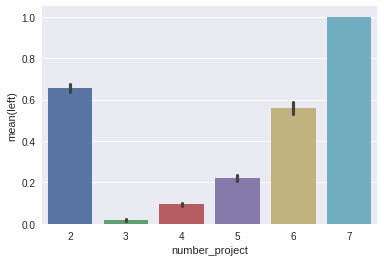

In [7]:
sns.barplot(df.number_project, df.left)

### Interesting ovbservation here, all the employees who are given 7 projects have left.

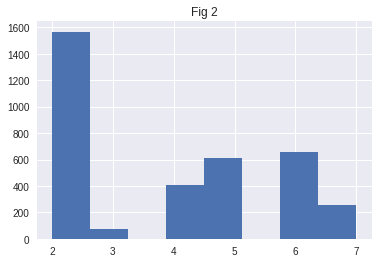

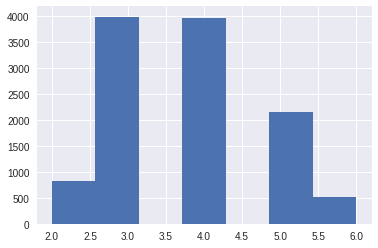

In [8]:
plt.hist(df.loc[df.left==1, 'number_project'], bins=8)
plt.title('Fig 2')
plt.figure()
plt.hist(df.loc[df.left==0, 'number_project'], bins=7)
plt.show()

### The people given only 2 projects of projects have a larger proportion among the people who left
### Whereas people with 3,4,5 projects doesn't leave that often.

In [9]:
df.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

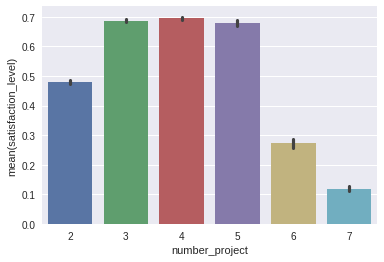

In [10]:
sns.barplot(df.number_project, df.satisfaction_level)

### High number of projects make employees less satified.
### These two visualozations cleary indicate that the employees who are given 3,4 or 5 projects are the most happy and doesn't tend to leave the job.

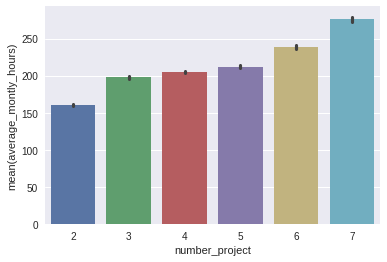

In [11]:
sns.barplot(df.number_project, df.average_montly_hours)

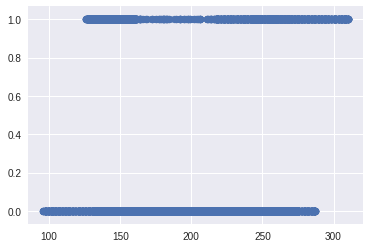

In [12]:
plt.scatter(df.average_montly_hours, df.left)

#### Employees who work very less doesn't leave at all and those who work too much(often having high number of projects) always leave.

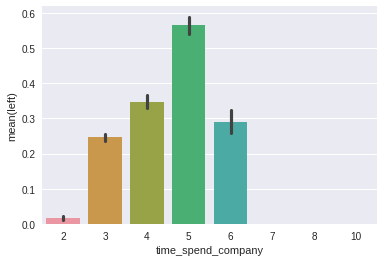

In [13]:
sns.barplot(df.time_spend_company, df.left)

#### Employees who have spent 5 years are most probable to leave.

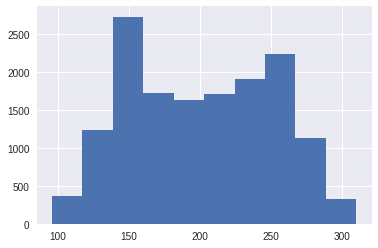

In [14]:
df.average_montly_hours.hist()

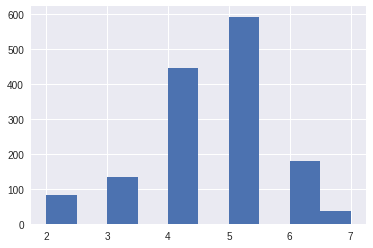

In [15]:
df.loc[df.time_spend_company==5, 'number_project'].hist()

## Prediction

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
import xgboost as xgb

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
from sklearn.cross_validation import KFold

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
for col in df.columns:
    if df[col].dtype=='object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [21]:
predictors = df.columns.drop(['left'])

In [22]:
clf = xgb.XGBClassifier(learning_rate=0.03, max_depth=7)

In [23]:
kf = KFold(n = df.shape[0], n_folds=3, random_state=1)

In [24]:
for train_index, test_index in kf:
    train = df.loc[train_index]
    test = df.loc[test_index]
    clf.fit(train[predictors], train['left'])
    preds = clf.predict(test[predictors])
    print('accuracy =', (preds==test['left']).mean())

accuracy = 0.9688
accuracy = 0.9904
accuracy = 0.969593918784
